In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.mixture import GaussianMixture

# Load the dataset from .pkl file
with open('SMAI-Dataset-problem-4.3/colors.pkl', 'rb') as file:
    data = pickle.load(file)

# print(data)

##### Observation: Each row in the means array represents the mean of a Gaussian component. The means represent the center or centroid of each Gaussian component in the 2D color space. The significance of means is that they indicate where the most probable values are concentrated for each component. In the context of color, the means represent the most representative color for each component.

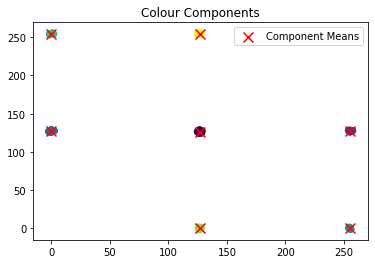

In [2]:
n_comps = 7
gmm = GaussianMixture(n_components=n_comps, random_state=42)
gmm.fit(data)
means = gmm.means_
covariances = gmm.covariances_

plt.scatter(data[:, 0], data[:, 1], c=gmm.predict(data), cmap='viridis')
plt.scatter(means[:,0], means[:,1], c='red', marker='x', s=100, label='Component Means')
plt.legend()
plt.title('Colour Components')
plt.show()

In [3]:
def generate_sample_dataset(num_components, means, covariances, num_samples=1000):
    sample_data = []
    for i in range(num_components):
        component_samples = np.random.multivariate_normal(means[i], covariances[i], num_samples)
        sample_data.append(component_samples)
    return np.vstack(sample_data)

Sample dataset is:
[[126.59584947 126.47541699]
 [129.10137955 129.44748404]
 [126.00699244 126.83290337]
 ...
 [128.0996719  255.12532474]
 [126.56132742 256.15373675]
 [128.70073693 254.27869342]]


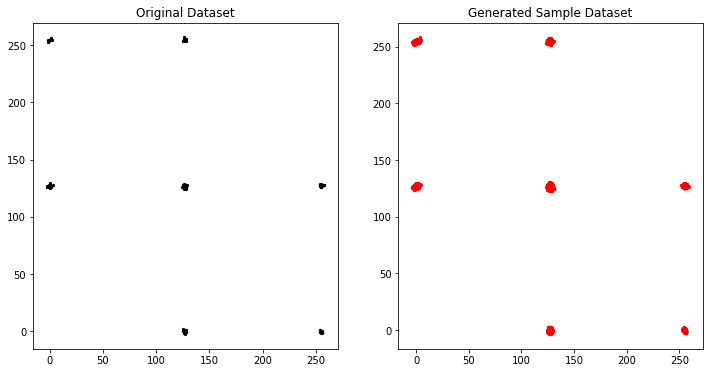

In [4]:
# Generate a sample dataset based on the identified components
sample_dataset = generate_sample_dataset(7, means, covariances)
print("Sample dataset is:")
print(sample_dataset)

# Visualization of the original dataset and the generated sample dataset
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c='black', s=5)
plt.title('Original Dataset')

plt.subplot(1, 2, 2)
plt.scatter(sample_dataset[:, 0], sample_dataset[:, 1], c='red', s=5)
plt.title('Generated Sample Dataset')

plt.show()

## Notes/Observations:
1) The mean of the sample observation is close to the mean of the component, indicating a typical value for that cluster.

2) Since we have multiple Gaussian components, the data generated from a particular component, that particular sample of data is going to belong to the cluster associated with that particular mean as observed by the plot also.

Mean of Sample Observation and Component Mean: When generating a sample dataset with multiple Gaussian components, each component's mean represents the central tendency or average of the data points it generates. The observation that the mean of the sample observation is close to the mean of the component indicates that the generated dataset is indeed centered around the specified means. In other words, the generated data clusters around the mean values provided, which is a desirable characteristic of the dataset.

Observation Interpretation: Mean of the generated data is close to the specified component means, it suggests that the generation process is working correctly and that the data points are distributed as expected around the specified means.

Associating Data with Gaussian Components: In a dataset generated from multiple Gaussian components, each data point is associated with one of the components based on the component's mean that it is closest to. This association is evident when you plot the data, and each cluster formed in the plot corresponds to one of the Gaussian components.

Observation Interpretation: We see distinct clusters in the plot, each centered around one of the specified means, it confirms that the generated dataset accurately represents the underlying Gaussian components. Each data point indeed belongs to the cluster associated with the closest component mean.